In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('milknew.csv')

In [9]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [10]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [11]:
df.shape

(1059, 8)

In [12]:
df.eq(0).sum()

pH              0
Temprature      0
Taste         480
Odor          601
Fat           348
Turbidity     539
Colour          0
Grade           0
dtype: int64

In [13]:
df.describe()
df.columns = ["pH", "Temprature", "Odor", "Taste", "Fat", "Turbidity", "Colour", "Grade"]

In [14]:
df["Grade"]=df["Grade"].replace(["low"], 0)
df["Grade"]=df["Grade"].replace(["medium"], 1)
df["Grade"]=df["Grade"].replace(["high"], 2)

<AxesSubplot:>

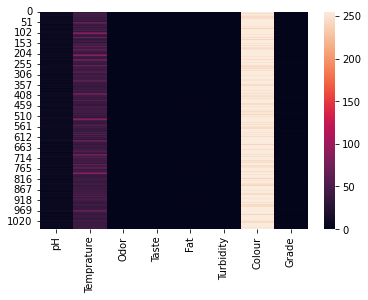

In [15]:
sns.heatmap(df)

In [16]:
df[['Temprature', 'Colour']]=df[['Temprature', 'Colour']].replace(0, np.nan)

<AxesSubplot:>

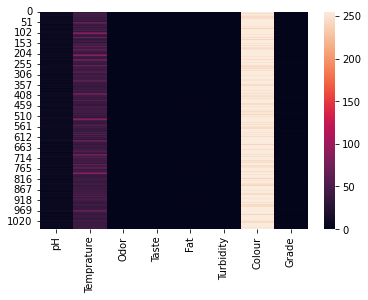

In [17]:
sns.heatmap(df)

<AxesSubplot:>

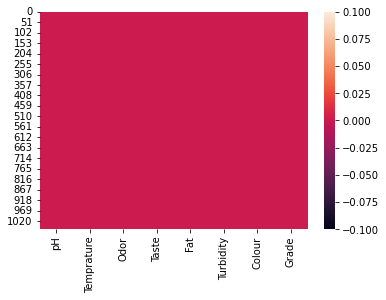

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.isnull().sum()

pH            0
Temprature    0
Odor          0
Taste         0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

<AxesSubplot:>

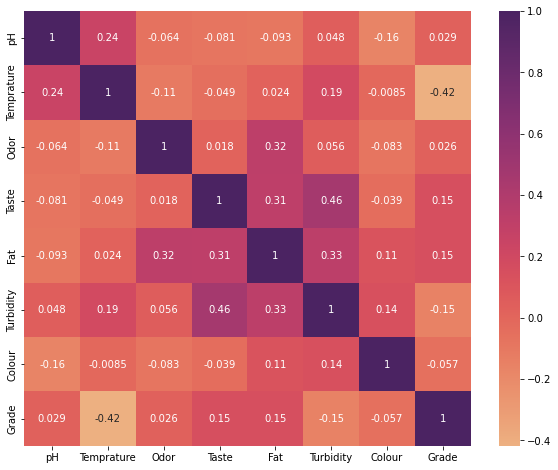

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='flare')

Train-Test-Split Method

In [21]:
x=df[['Temprature','Taste','Fat']]
y=df['Grade']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [24]:
x_train

,Temprature,Taste,Fat
338,45,1,1
870,37,1,1
208,66,0,1
421,66,0,1
438,43,0,1
...,...,...,...
455,50,0,0
898,40,1,1
571,45,1,0
1014,38,0,0


In [25]:
x_test

,Temprature,Taste,Fat
1049,37,0,0
159,45,1,1
228,36,0,1
1019,45,1,1
794,55,1,1
...,...,...,...
223,38,0,1
26,70,0,0
1001,45,1,1
987,70,0,0


In [26]:
y_train

338     1
870     2
208     0
421     0
438     0
       ..
455     0
898     0
571     1
1014    1
297     0
Name: Grade, Length: 741, dtype: int64

In [27]:
y_test

1049    1
159     1
228     1
1019    2
794     0
       ..
223     0
26      0
1001    2
987     0
1038    1
Name: Grade, Length: 318, dtype: int64

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=7)

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
predictions=knn.predict(x_test)

In [32]:
predictions

array([1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1,
       1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,
       1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1,
       2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0,

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       123
           1       1.00      0.82      0.90       124
           2       0.68      0.86      0.76        71

    accuracy                           0.85       318
   macro avg       0.84      0.85      0.84       318
weighted avg       0.87      0.85      0.85       318



In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
df.shape

(1059, 8)

In [37]:
1059/9

117.66666666666667

In [38]:
117.9*8

943.2

In [39]:
ks=list(range(1,900,2))

In [40]:
cvscores=[]

In [41]:
for k in ks:
    testknn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(testknn,x,y,cv=5,scoring='accuracy').mean()
    cvscores.append(score)

C:\Users\ratsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ratsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\ratsh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\ratsh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\ratsh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\ratsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 197, in predict
    neigh_dist, neigh_ind 

In [42]:
cvscores

[0.8186711973531253,
 0.8196101225073773,
 0.8602342841813467,
 0.8573862112134488,
 0.8573862112134488,
 0.8621031923455245,
 0.8554994187606187,
 0.8526692300813735,
 0.8498390414021284,
 0.8536126263077886,
 0.8564428149870338,
 0.8592730036662791,
 0.8526692300813735,
 0.8469954395063937,
 0.8469954395063937,
 0.8394482696950728,
 0.8309577036573371,
 0.8262451935974248,
 0.8234150049181794,
 0.8215282124653491,
 0.8130242332111239,
 0.8121031923455245,
 0.8120897791290351,
 0.8111463829026201,
 0.8064115174818921,
 0.803581328802647,
 0.8007377269069123,
 0.8007377269069123,
 0.7997943306804972,
 0.7998166860413127,
 0.7950773495484217,
 0.785607618706966,
 0.7865733702941966,
 0.7799472413484754,
 0.7846865778413664,
 0.7724000715371547,
 0.7780828042564607,
 0.7629884646338192,
 0.7677054457658947,
 0.7582714835017438,
 0.7573280872753287,
 0.7554412948224984,
 0.7460073325583476,
 0.7412679960654567,
 0.7431547885182868,
 0.7469283734239471,
 0.75071984261826,
 0.75164088348385

In [43]:
max(cvscores)

0.8621031923455245

In [44]:
cvscores.index(max(cvscores))

5

In [45]:
ks[5]

11

In [46]:
finalknn=KNeighborsClassifier(n_neighbors=11)
finalknn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

Bit Conversion

In [47]:
import pickle

In [52]:
pickle.dump(finalknn,open('Milk.pkl','wb'))

In [53]:
loadedmodel=pickle.load(open('Milk.pkl','rb'))

In [54]:
loadedmodel

KNeighborsClassifier(n_neighbors=11)

In [55]:
loadedmodel.predict([[200,30,45]])

array([0], dtype=int64)